# 77-Gabor 滤波器（Gabor Filter）

来进行Gabor 滤波吧。

Gabor 滤波器是一种结合了高斯分布和频率变换的滤波器，用于在图像的特定方向提取边缘。

滤波器由以下式子定义： $$ G(y, x) = e^{-\frac{{x'}^2 + \gamma^2\ {y'}^2}{2\ \sigma^2}} \ \cos(\frac{2\ \pi\ x'}{\lambda} + p)\ x'=\cos(A)\ x+\sin(A)\ y\ y'=-\sin(A)\ x+\cos(A)\ y $$ 其中：

$x$、$y$是滤波器的位置。滤波器的大小如果为$K$的话，$y$、$x$取$[-k//2,k//2]$；

$\gamma$：Gabor 滤波器的椭圆度；

$\sigma$：高斯分布的标准差；

$\lambda$：波长；

$p$：相位；

$A$：滤波核中平行条带的方向。

在这里，取$K=111$，$\sigma=10$，$\gamma = 1.2$，$\lambda =10$，$p=0$，$A=0$，可视化Gabor滤波器吧！

实际使用Gabor滤波器时，通过归一化以使滤波器值的绝对值之和为1​使其更易于使用。

在答案中，滤波器值被归一化至$[0,255]$以进行可视化。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Gabor_filter(K_size, Sigma, Gamma, Lambda, Psi, angle):

    d = K_size // 2

    gabor = np.zeros((K_size, K_size), dtype=np.float32)

    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d
            
            # degree -> radian
            theta = angle / 180. * np.pi
            
            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py
            
            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py
            
            # fill kernel
            gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)
            
    # kernel normalization
    gabor /= np.sum(np.abs(gabor))

    return gabor

In [7]:
gabor = Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0)

In [8]:
# normalize to [0, 255]
out = gabor - np.min(gabor)
out /= np.max(out)
out *= 255

out = out.astype(np.uint8)

In [9]:
cv2.imwrite("../picture/result77_Gabor Filter.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 78-旋转Gabor滤波器

在这里分别取$A=0,45,90,135$来求得旋转Gabor滤波器。其它参数和问题七十七一样，$K=111$，$\sigma=10$，$\gamma = 1.2$，$\lambda =10$，$p=0$。

Gabor滤波器可以通过这里的方法简单实现。

In [3]:
As = [0, 45, 90, 135]

In [7]:
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

<Figure size 432x288 with 0 Axes>

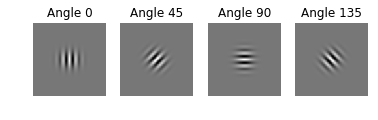

In [10]:
for i, A in enumerate(As):
    # get gabor kernel
    gabor = Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=A)

    # normalize to [0, 255]
    out = gabor - np.min(gabor)
    out /= np.max(out)
    out *= 255
    
    out = out.astype(np.uint8)
    plt.subplot(1, 4, i+1)
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.title("Angle "+str(A))
    
plt.savefig("../picture/result78_gabor.jpg")
plt.show()

# 79-使用Gabor滤波器进行边缘检测

图像灰度化之后，分别使用$A=0,45,90,135$的Gabor滤波器进行滤波。其它参数取为：$K=111$，$\sigma=10$，$\gamma = 1.2$，$\lambda =10$，$p=0$。

如在答案示例看到的那样， Gabor滤波器提取了指定的方向上的边缘。因此，Gabor滤波器在边缘特征提取方面非常出色。

一般认为 Gabor 滤波器接近生物大脑视皮层中的初级简单细胞（V1 区）。也就是说，当生物看见眼前的图像时也进行了特征提取。

一般认为深度学习的卷积层接近 Gabor 滤波器的功能。然而，在深度学习中，滤波器的系数通过机器学习自动确定。作为机器学习的结果，据说将发生类似于Gabor滤波器的过程。

In [12]:
def BGR2GRAY(img):
    
    # Grayscale
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    
    return gray

In [4]:
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
        
    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out

In [20]:
def Gabor_process(img):
    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    As = [0, 45, 90, 135]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        out = Gabor_filtering(gray, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)

        plt.subplot(1, 4, i+1)
        plt.imshow(out, cmap='gray')
        plt.axis('off')
        plt.title("Angle "+str(A))

    plt.savefig("../picture/result79_Gabor Filter.jpg")
    plt.show()

In [10]:
img = cv2.imread('../picture/chans.png').astype(np.float32)

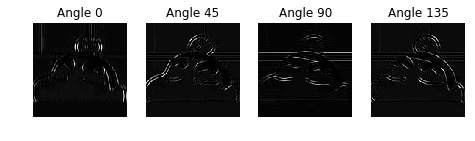

In [21]:
Gabor_process(img)

# 80-使用Gabor滤波器进行特征提取

通过将问题七十九中得到的4张图像加在一起，提取图像的特征。

观察得到的结果，图像的轮廓部分是白色的，获得了类似于边缘检测的输出。

深度学习中的卷积神经网络，最初已经具有提取图像的特征的功能，在不断重复特征提取的计算过程中，自动提取图像的特征。

In [22]:
def Gabor_process2(img):
    
    # get shape
    H, W, _ = img.shape

    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    As = [0, 45, 90, 135]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        _out = Gabor_filtering(gray, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)

        # add gabor filtered image
        out += _out

    # scale normalization
    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out

In [23]:
out = Gabor_process2(img)

<Figure size 432x288 with 0 Axes>

In [24]:
cv2.imwrite("../picture/result80_Gabor Filter.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()